<a href="https://colab.research.google.com/github/ranjith13119/Coursera_Capstone/blob/master/Traffic_Accidents_and_Vehicles_data_preprocessing__FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# %cd /content/drive/MyDrive/Classification/accidents
# !kaggle datasets download -d tsiaras/uk-road-safety-accidents-and-vehicles
# #unzipping the zip files and deleting the zip files
# !unzip \*.zip  && rm *.zipy

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
data_accident = pd.read_csv("/content/drive/MyDrive/Classification/accidents/Accident_Information.csv", low_memory=False, chunksize=30000)

In [ ]:
data_vic = pd.read_csv("/content/drive/MyDrive/Classification/accidents/Vehicle_Information.csv",  encoding= 'unicode_escape', low_memory=False, chunksize=30000)

In [ ]:
data_accident_chunk = []

for chunk in data_accident:
  preprocessedData = chunk [
        (chunk.Year.astype(int) >= 2010) &  # select the data from 2010 to 2017
        (chunk.Year.astype(int) <= 2017) &
        (chunk['Latitude'].notnull()) &
        (chunk['Longitude'].notnull())       
  ]
  data_accident_chunk.append(preprocessedData)

In [ ]:
df_accident = pd.concat(data_accident_chunk)

In [ ]:
df_accident.shape

(1143037, 34)

In [ ]:
vcchunk = []
for chunk2 in data_vic:
    vcchunk_filter = chunk2[
        (chunk2.Year.astype(int) >= 2010)&
        (chunk2.Year.astype(int) <= 2017)         
    ]
    vcchunk.append(vcchunk_filter)

In [ ]:
df_vichle_final = pd.concat(vcchunk)

In [ ]:
df_vichle_final.shape

(1399165, 24)

In [ ]:
df = pd.merge(df_accident, df_vichle_final, how = 'inner', on = 'Accident_Index')

In [ ]:
df.shape

(1399100, 57)

In [ ]:
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,201001BS70003,B,302.0,Unclassified,0.0,Slight,None,2010-01-11,Monday,1.0,Give way or uncontrolled,T or staggered junction,51.484087,Daylight,Kensington and Chelsea,Kensington and Chelsea,527580.0,177730.0,-0.164002,E01002900,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,07:30,Urban,Other,2010,No,36 - 45,1.0,Urban area,1.0,1360.0,None,None,Commuting to/from work,Mid Junction - on roundabout or on main road,CITROEN,BERLINGO FIRST 600,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,Van / Goods 3.5 tonnes mgw or under,No,Front,2010
1,201001BS70004,A,402.0,A,4204.0,Slight,None,2010-01-11,Monday,1.0,Auto traffic signal,T or staggered junction,51.509212,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,525340.0,180470.0,-0.195273,E01002884,1,1,0.0,5.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,18:35,Urban,Raining no high winds,2010,No,46 - 55,3.0,Urban area,5.0,1870.0,None,None,Journey as part of work,Mid Junction - on roundabout or on main road,RENAULT,SCENIC DYN DCI 130,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2010
2,201001BS70006,A,402.0,B,450.0,Slight,None,2010-01-12,Tuesday,1.0,Auto traffic signal,T or staggered junction,51.507804,Daylight,Kensington and Chelsea,Kensington and Chelsea,524800.0,180300.0,-0.203110,E01002871,1,2,0.0,5.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:22,Urban,Fine no high winds,2010,No,36 - 45,8.0,Urban area,2.0,3920.0,None,None,Journey as part of work,Mid Junction - on roundabout or on main road,IVECO-FORD,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning left,1,Goods over 3.5t. and under 7.5t,No,Nearside,2010
3,201001BS70007,Unclassified,0.0,Unclassified,0.0,Slight,None,2010-01-02,Saturday,1.0,Give way or uncontrolled,Mini-roundabout,51.513314,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,525080.0,180920.0,-0.198858,E01002886,1,2,0.0,0.0,Metropolitan Police,Dry,Roundabout,None,30.0,21:21,Urban,Fine no high winds,2010,No,21 - 25,7.0,Urban area,3.0,1998.0,None,None,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,NISSAN,PRIMERA SVE CVT,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Car,No,Nearside,2010
4,201001BS70007,Unclassified,0.0,Unclassified,0.0,Slight,None,2010-01-02,Saturday,1.0,Give way or uncontrolled,Mini-roundabout,51.513314,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,525080.0,180920.0,-0.198858,E01002886,1,2,0.0,0.0,Metropolitan Police,Dry,Roundabout,None,30.0,21:21,Urban,Fine no high winds,2010,No,36 - 45,11.0,Rural,9.0,1397.0,None,None,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,MERCEDES,A140 ELEGANCE,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead

In [ ]:
df["Age_Band_of_Driver"].value_counts()

26 - 35                         287933
36 - 45                         262069
46 - 55                         228923
21 - 25                         157307
56 - 65                         131654
Data missing or out of range    117838
16 - 20                         107870
66 - 75                          62744
Over 75                          38475
11 - 15                           3301
6 - 10                             863
0 - 5                              123
Name: Age_Band_of_Driver, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

2nd_Road_Class                                 39.761204
Driver_IMD_Decile                              36.904081
Age_of_Vehicle                                 17.600172
model                                          14.015653
Engine_Capacity_.CC.                           13.658566
Propulsion_Code                                13.251019
make                                            7.920949
LSOA_of_Accident_Location                       6.325709
2nd_Road_Number                                 0.816668
Pedestrian_Crossing-Physical_Facilities         0.096133
Vehicle_Location.Restricted_Lane                0.079337
Pedestrian_Crossing-Human_Control               0.045243
Time                                            0.005361
Speed_limit                                     0.004646
Did_Police_Officer_Attend_Scene_of_Accident     0.001215
Junction_Control                                0.000000
Number_of_Vehicles                              0.000000
Number_of_Casualties           

In [ ]:
df.describe(include ='all')

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
count,1399100,1399100,1.399100e+06,842801,1.387674e+06,1399100,1399100,1399100,1399100,1.399083e+06,1399100,1399100,1.399100e+06,1399100,1399100,1399100,1.399100e+06,1.399100e+06,1.399100e+06,1310597,1.399100e+06,1.399100e+06,1.398467e+06,1.397755e+06,1399100,1399100,1399100,1399100,1.399035e+06,1399025,1399100,1399100,1.399100e+06,1399100,1399100,1.152856e+06,1399100,882775.000000,1.208003e+06,1399100,1399100,1399100,1399100,1288278,1203007,1213705,1399100,1399100,1399100,1399100,1.397990e+06,1399100,1.399100e+06,1399100,1399100,1399100,1.399100e+06
unique,875263,6,NaN,6,NaN,3,7,2557,7,NaN,6,10,NaN,6,380,207,NaN,NaN,NaN,35266,NaN,NaN,NaN,NaN,51,6,6,9,NaN,1439,2,10,NaN,2,12,NaN,4,NaN,NaN,13,13,8,10,473,32815,12,4,7,7,10,NaN,19,NaN,21,3,6,NaN
top,2013460234852,A,NaN,Unclassified,NaN,Slight,None,2016-11-25,Friday,NaN,Give way or uncontrolled,Not at junction or within 20 metres,NaN,Daylight,Birmingham,Kent,NaN,NaN,NaN,E01032739,NaN,NaN,NaN,NaN,Metropolitan Police,Dry,Single carriageway,None,NaN,17:00,Urban,Fine no high winds,NaN,No,26 - 35,NaN,Urban area,NaN,NaN,None,None,Not known,Not at or within 20 metres of junction,FORD,MISSING,Petrol,Male,None,No tow/articulation,Did not leave carriageway,NaN,Going ahead other,NaN,Car,No,Front,NaN
freq,53,671384,NaN,568012,NaN,1198760,1375825,1052,231789,NaN,692503,545033,NaN,1046156,26426,43406,NaN,NaN,NaN,1137,NaN,NaN,NaN,NaN,220188,987374,1021322,1365286,NaN,13398,881801,1137992,NaN,1312993,287933,NaN,937464,NaN,NaN,1340588,1282004,834585,545364,165755,11877,704198,923984,1235470,1376607,1239064,NaN,636206,NaN,1047888,1393468,681036,NaN
mean,NaN,NaN,9.775001e+02,NaN,3.748740e+02,NaN,NaN,NaN,NaN,1.175339e+00,NaN,NaN,5.251939e+01,NaN,NaN,NaN,4.447670e+05,2.924059e+05,-1.361171e+00,NaN,1.445300e+00,2.121557e+00,8.640175e-03,7.675029e-01,NaN,NaN,NaN,NaN,3.936062e+01,NaN,NaN,NaN,2.013271e+03,NaN,NaN,7.608708e+00,NaN,5.371040,1.943540e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.114193e-01,NaN,1.549756e+00,NaN,NaN,NaN,2.013271e+03
std,NaN,NaN,1.781831e+03,NaN,1.286897e+03,NaN,NaN,NaN,NaN,3.878890e-01,NaN,NaN,1.428561e+00,NaN,NaN,NaN,9.483916e+04,1.586293e+05,1.392506e+00,NaN,1.066435e+00,9.773146e-01,1.231836e-01,1.862469e+00,NaN,NaN,NaN,NaN,1.446142e+01,NaN,NaN,NaN,2.054014e+00,NaN,NaN,4.777040e+00,NaN,2.817492,1.749640e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.044086e-01,NaN,7.825704e-01,NaN,NaN,NaN,2.054014e+00
min,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,4.991294e+01,NaN,NaN,NaN,6.495000e+04,1.029000e+04,-7.516225e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,2.010000e+03,NaN,NaN,1.000000e+00,NaN,1.000000,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,2.010000e+03
25%,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,5.147627e+01,NaN,NaN,NaN,3.834590e+05,

In [ ]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399100 entries, 0 to 1399099
Data columns (total 57 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1399100 non-null  object 
 1   1st_Road_Class                               1399100 non-null  object 
 2   1st_Road_Number                              1399100 non-null  float64
 3   2nd_Road_Class                               842801 non-null   object 
 4   2nd_Road_Number                              1387674 non-null  float64
 5   Accident_Severity                            1399100 non-null  object 
 6   Carriageway_Hazards                          1399100 non-null  object 
 7   Date                                         1399100 non-null  object 
 8   Day_of_Week                                  1399100 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

In [ ]:
max(df['2nd_Road_Class'].value_counts())

568012

In [ ]:
(max(df['2nd_Road_Class'].value_counts())/df['2nd_Road_Class'].shape[0])*100

40.59838467586305

As we are havin more that 40% of data in unclassified data I'm droping this feature

In [ ]:
df.drop("2nd_Road_Class", axis = 1, inplace=True)

In [ ]:
#check corr b/t Location_Easting_OSGR & Location_Northing_OSGR AND Longitude and Latitude

print(df['Location_Easting_OSGR'].corr(df['Longitude']))
print(df['Location_Northing_OSGR'].corr(df['Latitude']))

0.9993766439630065
0.9999725836579388


There is high correlation bw these feature. so i'm droping these feature also to reduce the curse of dimentinallity

In [ ]:
df.drop(['Longitude', 'Latitude'], axis = 1, inplace = True)

In [ ]:
df.shape

(1399100, 54)

In [ ]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

In [ ]:
df['date'] = pd.to_datetime((df['date']), format= "%Y-%m-%d")

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['1st_road_number', '2nd_road_number', 'did_police_officer_attend_scene_of_accident', 'location_easting_osgr', 'location_northing_osgr', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'speed_limit', 'age_of_vehicle', 'driver_imd_decile', 'engine_capacity_cc', 'vehicle_locationrestricted_lane'], datetime64[ns]: ['date'], int64: ['number_of_casualties', 'number_of_vehicles', 'year_x', 'vehicle_reference', 'year_y'], object: ['accident_index', '1st_road_class', 'accident_severity', 'carriageway_hazards', 'day_of_week', 'junction_control', 'junction_detail', 'light_conditions', 'local_authority_district', 'local_authority_highway', 'lsoa_of_accident_location', 'police_force', 'road_surface_conditions', 'road_type', 'special_conditions_at_site', 'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland', 'age_band_of_driver', 'driver_home_area_type', 'hit_object_in_carriageway', 'hit_object_off_carriageway', 'journey_purpose_of_driver', 'jun

{float64: ['1st_road_number', '2nd_road_number', 'did_police_officer_attend_scene_of_accident', 'location_easting_osgr', 'location_northing_osgr', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'speed_limit', 'age_of_vehicle', 'driver_imd_decile', 'engine_capacity_cc', 'vehicle_locationrestricted_lane'], 

datetime64[ns]: ['date'], 

int64: ['number_of_casualties', 'number_of_vehicles', 'year_x', 'vehicle_reference', 'year_y'], 

object: ['accident_index', '1st_road_class', 'accident_severity', 'carriageway_hazards', 'day_of_week', 'junction_control', 'junction_detail', 'light_conditions', 'local_authority_district', 'local_authority_highway', 'lsoa_of_accident_location', 'police_force', 'road_surface_conditions', 'road_type', 'special_conditions_at_site', 'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland', 'age_band_of_driver', 'driver_home_area_type', 'hit_object_in_carriageway', 'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 'make', 'model', 'propulsion_code', 'sex_of_driver', 'skidding_and_overturning', 'towing_and_articulation', 'vehicle_leaving_carriageway', 'vehicle_manoeuvre', 'vehicle_type', 'was_vehicle_left_hand_drive', 'x1st_point_of_impact']}

In [ ]:
df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']]= df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']].astype('object')

In [ ]:
df['driver_imd_decile'].value_counts()

3.0     93601
4.0     93214
2.0     92998
5.0     92621
6.0     91494
7.0     87673
1.0     86861
8.0     85444
9.0     83118
10.0    75751
Name: driver_imd_decile, dtype: int64

In [ ]:
df['age_of_vehicle'].describe()

count    1.152856e+06
mean     7.608708e+00
std      4.777040e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      1.110000e+02
Name: age_of_vehicle, dtype: float64

In [ ]:
df['age_of_vehicle'].isna().sum()

246244

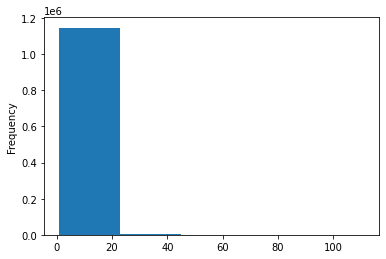

In [ ]:
df['age_of_vehicle'].plot.hist(bins=5)

In [ ]:
df['age_of_vehicle'].median()

7.0

In [ ]:
df['age_of_vehicle'].fillna(df['age_of_vehicle'].median(), inplace = True)

In [ ]:
df['age_of_vehicle'].isna().sum()

0

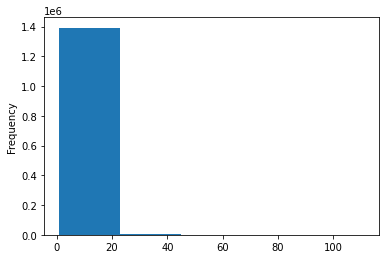

In [ ]:
df['age_of_vehicle'].plot.hist(bins=5)

In [ ]:
max(df['age_of_vehicle'])

111.0

Vichle Age may play a role in the accident. So i'm creating the diff. category based on the age group.

In [ ]:
def fixedvehicleage(age):
    if age>=0 and age<=120:
        return age
    else:
        return np.nan

In [ ]:
df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixedvehicleage)

In [ ]:
df['age_of_vehicle'].isna().sum()

0

In [ ]:
df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'], [0,5, 10, 20,40,60,80,100,120], labels=['1', '2', '3','4','5','6', '7', '8'])

In [ ]:
df['age_of_vehicle'].nunique()

8

In [ ]:
#model
df['model'].value_counts()/df.shape[0]*100

MISSING                           0.848903
KA                                0.320849
CLIO DYNAMIQUE 16V                0.288328
SPRINTER 313 CDI                  0.268959
FIESTA ZETEC                      0.239082
                                    ...   
BRERA 1750 TBI                    0.000071
TIGUAN SE TSI 4MOTION             0.000071
KUGA TITANIUM X SPORT 4X4 A       0.000071
CADDY MAXI C20 MATCH TDI S-A      0.000071
TOUAREG V6 R-LINE TDI BMT AUTO    0.000071
Name: model, Length: 32815, dtype: float64

A lot of the values of "model' are labeled as "missing". I do not want to change these because the model could have actually been missing from the car from the accident or it could not be recognizable at the time of the accident.

In [ ]:
df.drop(['model'], axis = 1 , inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


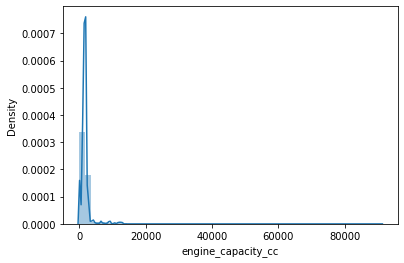

In [ ]:
import seaborn as sns
sns.distplot(df['engine_capacity_cc'])

The plot is showing that it is a left skwed data

accident_severity
Fatal      AxesSubplot(0.125,0.125;0.775x0.755)
Serious    AxesSubplot(0.125,0.125;0.775x0.755)
Slight     AxesSubplot(0.125,0.125;0.775x0.755)
Name: engine_capacity_cc, dtype: object

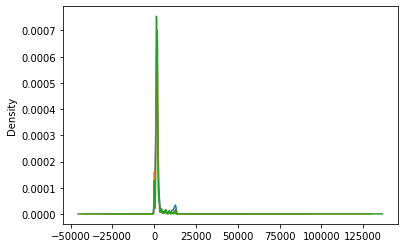

In [ ]:
df.groupby(['accident_severity'])['engine_capacity_cc'].plot(kind = 'kde')

In [ ]:
q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
iqr = q75 - q25
 
ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print(ecmax)
print(ecmin)

3040.5
252.5


In [ ]:
IQR=df['engine_capacity_cc'].quantile(0.75)-df['engine_capacity_cc'].quantile(0.25)
ower_bridge=df['engine_capacity_cc'].quantile(0.25)-(IQR*3)
upper_bridge=df['engine_capacity_cc'].quantile(0.75)+(IQR*3)
print(ower_bridge), print(upper_bridge)

-793.0
4086.0


(None, None)

In [ ]:
df.loc[df['engine_capacity_cc'] >= upper_bridge, 'engine_capacity_cc'] = upper_bridge

In [ ]:
df['engine_capacity_cc'].skew()

1.0544725971108875

In [ ]:
df['engine_capacity_cc'].fillna(df['engine_capacity_cc'].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


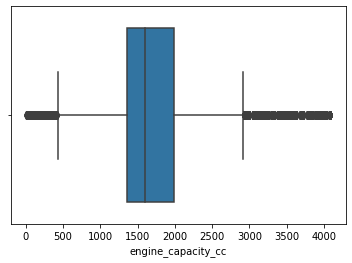

In [ ]:
sns.boxplot(df['engine_capacity_cc'])

In [ ]:
df.drop('make', axis = 1, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

driver_imd_decile                              516325
propulsion_code                                185395
lsoa_of_accident_location                       88503
2nd_road_number                                 11426
pedestrian_crossing-physical_facilities          1345
vehicle_locationrestricted_lane                  1110
pedestrian_crossing-human_control                 633
time                                               75
speed_limit                                        65
did_police_officer_attend_scene_of_accident        17
local_authority_highway                             0
police_force                                        0
number_of_vehicles                                  0
number_of_casualties                                0
location_northing_osgr                              0
location_easting_osgr                               0
light_conditions                                    0
local_authority_district                            0
road_type                   

In [ ]:
df['lsoa_of_accident_location'].describe()

count       1310597
unique        35266
top       E01032739
freq           1137
Name: lsoa_of_accident_location, dtype: object

In [ ]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

driver_imd_decile                              36.904081
propulsion_code                                13.251019
lsoa_of_accident_location                       6.325709
2nd_road_number                                 0.816668
pedestrian_crossing-physical_facilities         0.096133
vehicle_locationrestricted_lane                 0.079337
pedestrian_crossing-human_control               0.045243
time                                            0.005361
speed_limit                                     0.004646
did_police_officer_attend_scene_of_accident     0.001215
local_authority_highway                         0.000000
police_force                                    0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
location_northing_osgr                          0.000000
location_easting_osgr                           0.000000
light_conditions                                0.000000
local_authority_district       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


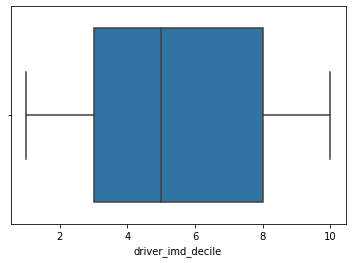

In [ ]:
sns.boxplot(df.driver_imd_decile)

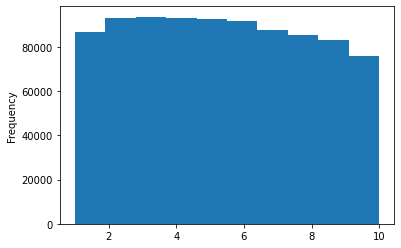

In [ ]:
df.driver_imd_decile.plot.hist()

In [ ]:
df.driver_imd_decile.fillna(method='ffill', inplace = True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

propulsion_code                                13.251019
lsoa_of_accident_location                       6.325709
2nd_road_number                                 0.816668
pedestrian_crossing-physical_facilities         0.096133
vehicle_locationrestricted_lane                 0.079337
pedestrian_crossing-human_control               0.045243
time                                            0.005361
speed_limit                                     0.004646
did_police_officer_attend_scene_of_accident     0.001215
local_authority_highway                         0.000000
police_force                                    0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
location_northing_osgr                          0.000000
location_easting_osgr                           0.000000
junction_detail                                 0.000000
local_authority_district                        0.000000
light_conditions               

In [ ]:
df.propulsion_code.value_counts()

Petrol                 704198
Heavy oil              498981
Hybrid electric          8336
Gas/Bi-fuel              1089
Electric                  443
Petrol/Gas (LPG)          385
Electric diesel           142
Gas                       113
New fuel technology         8
Gas Diesel                  6
Steam                       3
Fuel cells                  1
Name: propulsion_code, dtype: int64

In [ ]:
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas", value="LPG")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas/Bi-fuel", value="Bio-fuel")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Petrol/Gas (LPG)", value="LPG")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas Diesel", value="Diesel")

In [ ]:
df.propulsion_code.value_counts()

Petrol                 704198
Heavy oil              498981
Hybrid electric          8336
Bio-fuel                 1089
LPG                       498
Electric                  443
Electric diesel           142
New fuel technology         8
Diesel                      6
Steam                       3
Fuel cells                  1
Name: propulsion_code, dtype: int64

In [ ]:
df.propulsion_code = np.where(df.propulsion_code.isnull(), "Missing", df.propulsion_code)

In [ ]:
df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)

There is very high outlairs in this feature. so i decided to drop this feature

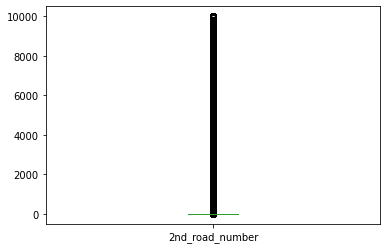

In [ ]:
df['2nd_road_number'].plot(kind='box')

In [ ]:
IQR=df['2nd_road_number'].quantile(0.75)-df['2nd_road_number'].quantile(0.25)
ower_bridge=df['2nd_road_number'].quantile(0.25)-(IQR*3)
upper_bridge=df['2nd_road_number'].quantile(0.75)+(IQR*3)
print(ower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [ ]:
df.drop(['2nd_road_number'], inplace = True, axis = 1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

accident_index                                 0
1st_road_class                                 0
1st_road_number                                0
accident_severity                              0
carriageway_hazards                            0
date                                           0
day_of_week                                    0
did_police_officer_attend_scene_of_accident    0
junction_control                               0
junction_detail                                0
light_conditions                               0
local_authority_district                       0
local_authority_highway                        0
location_easting_osgr                          0
location_northing_osgr                         0
lsoa_of_accident_location                      0
number_of_casualties                           0
number_of_vehicles                             0
pedestrian_crossing-human_control              0
pedestrian_crossing-physical_facilities        0
police_force        

In [ ]:
df.shape

(1396895, 51)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['month'] = df ['date'].apply(lambda time: time.month)

In [ ]:
#creating a weekend feature that includes Friday-Sunday. Because we need give high importance to these days. 
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

In [ ]:
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [ ]:
df['time'].value_counts()

17:00    13360
17:30    12793
18:00    11951
16:00    11685
16:30    11392
         ...  
04:42       39
04:26       36
04:37       35
04:34       33
04:01       31
Name: time, Length: 1439, dtype: int64

In [ ]:
#pull time data and create hour column
df['hour'] = df['time'].str[0:2]
 
#convert to numeric    
df['hour'] =  pd.to_numeric(df['hour'])

#convert to integer
df['hour'] = df['hour'].astype('int')

In [ ]:
df['hour']

0           7
1          18
2          10
3          21
4          21
           ..
1399095    16
1399096    16
1399097     7
1399098    20
1399099    12
Name: hour, Length: 1396895, dtype: int64

In [ ]:
def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"

In [ ]:
df['time_of_day']= df['hour'].apply(daygroup)

In [ ]:
df['vehicle_type'].value_counts()

Car                                      1046323
Van / Goods 3.5 tonnes mgw or under        77212
Motorcycle 125cc and under                 44071
Motorcycle over 500cc                      42932
Pedal cycle                                38449
Bus or coach (17 or more pass seats)       35924
Taxi/Private hire car                      30394
Goods 7.5 tonnes mgw and over              26868
Motorcycle 50cc and under                  13138
Motorcycle over 125cc and up to 500cc      13085
Goods over 3.5t. and under 7.5t            10180
Other vehicle                               8009
Minibus (8 - 16 passenger seats)            3402
Agricultural vehicle                        3144
Goods vehicle - unknown weight              1846
Motorcycle - unknown cc                      731
Mobility scooter                             498
Data missing or out of range                 348
Ridden horse                                 223
Electric motorcycle                           77
Tram                

In [ ]:
#motorcycles
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Motorcycle over 125cc and up to 500cc",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under", 
                                                value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Electric motorcycle", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc", 
                                                        value="Motorcycle")


#Goods_vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Van / Goods 3.5 tonnes mgw or under", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods vehicle - unknown weight", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over", 
                                                        value="Goods Vehicle")

#car
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car", 
                                                        value="Car")


#bus
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)", 
                                                        value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Bus or coach (17 or more pass seats)", 
                                                        value="Bus")

#other vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle", 
                                                        value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle", 
                                                        value="Other Vehicle")

In [ ]:
df['vehicle_type'].value_counts()

Car                             1076717
Goods Vehicle                    116106
Motorcycle                       114034
Bus                               39326
Pedal cycle                       38449
Other Vehicle                     11153
Mobility scooter                    498
Data missing or out of range        348
Ridden horse                        223
Tram                                 41
Name: vehicle_type, dtype: int64

In [ ]:
df['age_band_of_driver'].value_counts()

26 - 35                         287538
36 - 45                         261755
46 - 55                         228652
21 - 25                         157122
56 - 65                         131513
Data missing or out of range    117227
16 - 20                         107678
66 - 75                          62689
Over 75                          38449
11 - 15                           3290
6 - 10                             860
0 - 5                              122
Name: age_band_of_driver, dtype: int64

In [ ]:
age1 = ["0 - 5", "6 - 10", "11 - 15"]
age2 = ["16 - 20","21 - 25"]
age3 = ["26 - 35","36 - 45"]
age4 = ["46 - 55", "56 - 65"]
age5 = ["66 - 75", "Over 75"]

In [ ]:
#motorcycles
df['age_band_of_driver'].replace(to_replace="0 - 5", value="Under 16", inplace = True)
df['age_band_of_driver'].replace(to_replace= "6 - 10" ,  value="Under 16", inplace = True)
df['age_band_of_driver'].replace(to_replace= "11 - 15" ,  value="Under 16", inplace = True)
df['age_band_of_driver'].replace(to_replace= "16 - 20" ,  value="16-25", inplace = True)
df['age_band_of_driver'].replace(to_replace="21 - 25", value="16-25", inplace = True)

df['age_band_of_driver'].replace(to_replace= "26 - 35" ,  value="26-45", inplace = True)
df['age_band_of_driver'].replace(to_replace= "36 - 45" ,  value="26-45", inplace = True)
df['age_band_of_driver'].replace(to_replace="46 - 55", value="46-65", inplace = True)
df['age_band_of_driver'].replace(to_replace="56 - 65", value="46-65", inplace = True)
df['age_band_of_driver'].replace(to_replace= "66 - 75" ,  value="Over 65", inplace = True)
df['age_band_of_driver'].replace(to_replace= "Over 75" ,  value="Over 65", inplace = True)

In [ ]:
df['age_band_of_driver'].value_counts()

26-45                           549293
46-65                           360165
16-25                           264800
Data missing or out of range    117227
Over 65                         101138
Under 16                          4272
Name: age_band_of_driver, dtype: int64

In [ ]:
#group number_of_vehicles

def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "4+"
  
#apply function   
df['number_of_vehicles']= df['number_of_vehicles'].apply(vehicles)

In [ ]:
df['number_of_vehicles'].dtypes

dtype('O')

In [ ]:
df['number_of_vehicles']=df['number_of_vehicles'].astype('object')

In [ ]:
def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
       return "winter"
    elif(month == 3 or month == 4 or month == 5):
       return "spring"
    elif(month == 6 or month== 7 or month == 8):
       return "summer"
    else:
       return "fall"

df['season'] = df['month'].apply(getSeason)

In [ ]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)

In [ ]:
df.to_pickle("/content/drive/MyDrive/Classification/accidents/df.pkl")

In [ ]:
#import pickled file
df = pd.read_pickle("/content/drive/MyDrive/Classification/accidents/df.pkl")
df.head()

,accident_index,1st_road_class,1st_road_number,accident_severity,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,junction_detail,light_conditions,local_authority_district,local_authority_highway,location_easting_osgr,location_northing_osgr,lsoa_of_accident_location,number_of_casualties,number_of_vehicles,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,police_force,road_surface_conditions,road_type,special_conditions_at_site,speed_limit,time,urban_or_rural_area,weather_conditions,year_x,inscotland,age_band_of_driver,age_of_vehicle,driver_home_area_type,driver_imd_decile,engine_capacity_cc,hit_object_in_carriageway,hit_object_off_carriageway,journey_purpose_of_driver,junction_location,propulsion_code,sex_of_driver,skidding_and_overturning,towing_and_articulation,vehicle_leaving_carriageway,vehicle_locationrestricted_lane,vehicle_manoeuvre,vehicle_reference,vehicle_type,was_vehicle_left_hand_drive,x1st_point_of_impact,year_y,month,weekend,hour,time_of_day,season,engine_capacity_cc_size
0,201001BS70003,B,302,Slight,None,2010-01-11,Monday,1,Give way or uncontrolled,T or staggered junction,Daylight,Kensington and Chelsea,Kensington and Chelsea,527580.0,177730.0,E01002900,1,2,0,0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,07:30,Urban,Other,2010,No,26-45,1,Urban area,1.0,1360.0,None,None,Commuting to/from work,Mid Junction - on roundabout or on main road,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0,Turning right,1,Goods Vehicle,No,Front,2010,1,0,7,1,winter,small engine cc
1,201001BS70004,A,402,Slight,None,2010-01-11,Monday,1,Auto traffic signal,T or staggered junction,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,525340.0,180470.0,E01002884,1,1,0,5,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,18:35,Urban,Raining no high winds,2010,No,46-65,1,Urban area,5.0,1870.0,None,None,Journey as part of work,Mid Junction - on roundabout or on main road,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0,Going ahead other,1,Car,No,Front,2010,1,0,18,6,winter,medium engine cc
2,201001BS70006,A,402,Slight,None,2010-01-12,Tuesday,1,Auto traffic signal,T or staggered junction,Daylight,Kensington and Chelsea,Kensington and Chelsea,524800.0,180300.0,E01002871,1,2,0,5,Metropolitan Police,Dry,Single carriageway,None,30.0,10:22,Urban,Fine no high winds,2010,No,26-45,2,Urban area,2.0,3920.0,None,None,Journey as part of work,Mid Junction - on roundabout or on main road,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0,Turning left,1,Goods Vehicle,No,Nearside,2010,1,0,10,2,winter,large engine cc
3,201001BS70007,Unclassified,0,Slight,None,2010-01-02,Saturday,1,Give way or uncontrolled,Mini-roundabout,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,525080.0,180920.0,E01002886,1,2,0,0,Metropolitan Police,Dry,Roundabout,None,30.0,21:21,Urban,Fine no high winds,2010,No,16-25,2,Urban area,3.0,1998.0,None,None,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0,Going ahead right-hand bend,1,Car,No,Nearside,2010,1,1,21,6,winter,medium engine cc
4,201001BS70007,Unclassified,0,Slight,None,2010-01-02,Saturday,1,Give way or uncontrolled,Mini-roundabout,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,525080.0,180920.0,E01002886,1,2,0,0,Metropolitan Police,Dry,Roundabout,None,30.0,21:21,Urban,Fine no high winds,2010,No,26-45,3,Rural,9.0,1397.0,None,None,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0,Going ahead other,2,Car,No,Front,2010,1,1,21,6,winter,small engine cc


In [ ]:
df.info()

In [ ]:
df['age_of_vehicle'].astype('object')

0          1
1          1
2          2
3          2
4          3
          ..
1399095    3
1399096    2
1399097    2
1399098    3
1399099    1
Name: age_of_vehicle, Length: 1396895, dtype: object

In [ ]:
categorical_features = df.select_dtypes('object')

In [ ]:
len(categorical_features.columns)

44

In [ ]:
numerical_features = df.select_dtypes(['int64', 'float64'])

In [ ]:
len(numerical_features.columns)

11

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

In [ ]:
def plot_feature_distribution(df, feature):
  plt.figure(figsize=(10,3))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  plt.title(feature)
  stat.probplot((df[feature] **1/2),dist='norm',plot=pylab)
  plt.show()

In [ ]:
discreate_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

location_easting_osgr


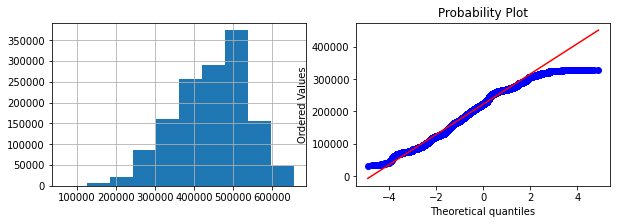

location_northing_osgr


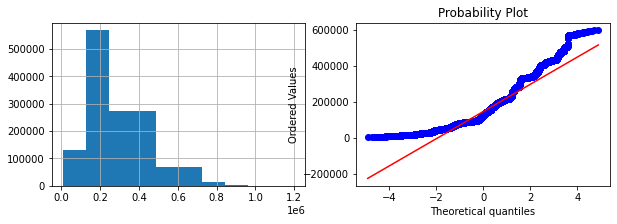

number_of_casualties


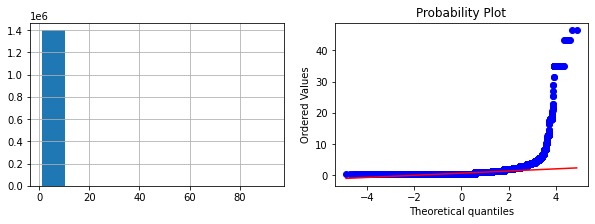

engine_capacity_cc


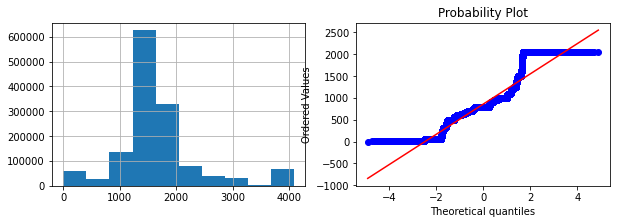

In [ ]:
for feature in numerical_features:
  if feature not in discreate_Feature:
    print(feature)
    plot_feature_distribution(df, feature)

In [ ]:
df1 = df.copy()

In [ ]:
categorical_feature=df1.select_dtypes(exclude=['int','float','int64'])
numerical_features = df1.select_dtypes(include=['int','float','int64'])

In [ ]:
print('Objects',categorical_feature.columns)
print("\nNonObjects",numerical_features.columns)

print(df1.shape)
print(numerical_features.shape)
print(categorical_feature.shape)

In [ ]:
df1.drop(['date', 'time', 'hour'], inplace = True, axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#label encode objects
# en_cat_fet = categorical_feature.apply(LabelEncoder().fit_transform)

#re-add with non-objects
# df_ml = pd.concat([en_cat_fet, numerical_features], axis=1, sort=False)

#check shape
# print(df_ml.shape)

(1396895, 57)
